<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa_after/PSD_histogram_BEST_sample_08_value_15_run_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [173]:
Repetir = 60

In [174]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4

In [175]:
#!pip install mahotas

In [176]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [177]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 485 (delta 109), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (485/485), 166.45 MiB | 26.23 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (101/101), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado


In [178]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [179]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [180]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.64 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines


In [181]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [182]:
FILE='SugarSample08_new.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=',' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=',' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [183]:
df_ImgJ.head()

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047


In [184]:
name

'sample_08_03.csv'

In [185]:
f.namelist()

['sample_08_01.csv', 'sample_08_02.csv', 'sample_08_03.csv']

In [186]:
#df_ImgJ.head()

In [187]:
#df_ImgJ.head()

In [188]:
from Segment_Filter_Reviseted_2022 import Segmenta  # got image provided segmented

In [189]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [190]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [191]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [192]:
Img_Size = 28

In [193]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [194]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 3s 157ms/step - loss: 0.5734 - accuracy: 0.7405 - val_loss: 0.6935 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 136ms/step - loss: 0.2751 - accuracy: 0.9096 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1874 - accuracy: 0.9388 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1851 - accuracy: 0.9300 - val_loss: 0.6939 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 130ms/step - loss: 0.1174 - accuracy: 0.9592 - val_loss: 0.6939 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0565 - accuracy: 0.9913 - val_loss: 0.6940 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 132ms/step - loss: 0.0488 - accuracy: 0.9883 - val_loss: 0.6937 - val_accuracy: 0.4898

In [195]:
Y_test = yback(Y_test)

In [196]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         5  70


In [197]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.96      0.93      0.95        75

    accuracy                           0.95       147
   macro avg       0.95      0.95      0.95       147
weighted avg       0.95      0.95      0.95       147



In [198]:
pred_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [199]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [200]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [201]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,106.021385,102.517738,100.602768,98.726868,100.299042,102.379929,106.565758,110.960838,111.091019,102.310410,57.015789,32.171204,43.491402,44.292053,43.403469,40.996269,29.097778,10.609695,6.137055,7.602937,15.242759,34.520657,50.738708,57.760445,60.663128,61.190136,63.598274,66.487144,103.868004,103.077957,101.216812,96.037170,95.556198,97.105171,99.662895,105.924065,107.585747,101.856941,74.689011,37.493385,...,0.994522,0.967717,0.752229,0.500728,0.773207,0.985316,0.928093,1.003380,2.514539,4.759279,2.126624,1.367461,7.534584,7.470951,7.386107,7.689587,7.606375,6.854204,7.037352,7.188275,7.196899,8.377949,9.130120,8.293572,7.123419,7.101392,6.954548,6.777519,6.908047,7.213158,7.585164,7.493794,7.302896,7.084261,6.433249,7.076102,8.611385,9.990909,9.787133,8.360177
1,88.790459,41.270100,42.928505,60.307178,63.414772,65.570267,67.066071,68.199951,67.755989,58.584743,43.625034,44.005932,48.167389,49.215469,46.329967,44.909042,45.133987,46.741982,49.501629,50.671478,48.673035,50.844585,56.202827,60.518806,59.822090,49.349701,35.022633,30.850170,105.154282,91.415558,56.832291,49.355099,55.794975,55.966206,53.155037,47.448151,39.962761,37.303688,36.403366,40.658298,...,56.658409,41.064537,14.021666,23.544926,33.321831,38.139896,47.991116,66.246964,75.992592,79.383011,80.265266,78.212273,94.369110,92.560791,89.578293,91.251785,90.243820,71.383118,54.944405,55.158905,55.795540,57.510536,59.339905,62.355770,68.711319,68.861496,58.446884,54.496975,52.002171,34.603588,11.349110,23.533493,36.355900,49.208221,61.969265,70.628609,73.396873,73.626190,73.094933,74.948074
2,77.276390,78.238373,80.219620,83.952362,90.030533,94.692802,98.184753,104.981392,54.193119,34.125187,55.220200,55.844189,48.136459,43.155563,37.855404,35.033607,37.338123,43.380394,47.342377,55.791092,52.800583,37.879669,27.002495,28.091335,26.931362,25.657001,39.612843,70.313316,75.889809,76.238976,80.228233,82.896088,86.168152,91.945625,94.770546,98.970757,95.060860,45.158989,56.372192,57.289387,...,76.944580,77.082565,76.494774,72.776245,60.020752,45.757385,39.961380,38.830544,40.380665,44.136761,43.898773,54.159733,81.169868,78.912094,58.833397,29.669937,37.266876,54.958996,60.806477,64.196907,65.727646,66.748230,68.990356,71.158112,73.914154,74.853493,74.830627,73.050629,75.878601,80.741570,89.614487,103.574303,114.386414,102.859169,63.650700,36.531101,37.722679,39.155590,40.193169,37.193855
3,50.526630,68.573975,80.982262,87.242615,87.207100,82.071014,83.745567,87.686394,87.106522,85.047340,94.479301,86.763329,55.041431,38.378700,38.337284,74.822487,90.745575,95.680496,98.384613,100.822495,110.461548,111.289940,103.905334,97.905334,95.230782,94.769241,96.929001,98.266281,68.431953,73.698227,84.437874,90.721901,92.177521,87.278114,86.786987,88.218941,88.443794,87.994087,87.118347,89.414215,...,91.153854,96.538467,100.568047,99.396454,95.816582,94.692314,92.147934,85.650894,88.035507,91.088768,93.284035,99.958588,69.686394,69.355042,72.118347,73.278114,72.970421,73.526634,71.970413,66.775146,51.005920,40.946751,44.284031,46.295856,47.195271,55.325447,71.071014,82.207108,87.792908,95.331367,98.331367,95.668648,94.680489,95.591736,95.284027,85.071022,86.295860,89.230774,91.437874,97.875740
4,50.168701,24.976562,29.000124,29.779591,37.348812,64.714798,78.831291,83.985245,84.548515,82.290848,82.912827,82.939484,85.908859,88.438339,91.787209,92.084198,89.566002,91.292831,97.823227,102.349121,108.918465,115.988716,121.693970,127.643997,128.562836,128.405853,132.471085,99.075577,71.570396,19.992994,18.168579,22.189161,42.734146,64.875999,75.978668,84.060020,86.325188,86.599358,86.888527,86.971977,...,1.290533,1.304173,1.171864,1.105152,1.050654,1.137578,0.958646,1.015314,1.081964,1.081468,0.715171,0.524

In [202]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [203]:
#df_ann

In [204]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [205]:
img_graos.shape

(83, 785)

In [206]:
prediction

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [207]:
img_graos.shape

(83, 785)

In [208]:
Width=np.array(Width_new)

In [209]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

#from Get_PSDArea_Revival import PSDArea
from Get_PSDArea_Reviseted_2022_value_15 import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 911, done.
remote: Counting objects: 100% (672/672), done.
remote: Compressing objects: 100% (670/670), done.
remote: Total 911 (delta 443), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (911/911), 6.56 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (580/580), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [210]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [211]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [212]:
Width.shape

(83,)

In [213]:
Width

array([193, 182, 127, 126, 152, 180, 190, 147, 195, 129, 183, 108, 197,
       118, 171, 134, 171, 104, 119, 115, 185, 180, 132, 112, 147, 182,
       153, 178, 169, 124, 196, 116, 182, 134, 103, 193, 124, 181, 120,
       177, 188, 150, 113, 179, 153, 109, 151, 135, 145, 119, 124, 148,
       101, 162, 196, 197, 196, 137, 148, 165, 142, 188, 159, 183, 162,
       167, 155, 170, 115, 178, 137, 144, 177, 150, 159, 105, 180, 145,
       134, 162, 157, 197, 109])

In [214]:
img_graos.shape

(83, 785)

In [215]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,193.0,88.790459,41.270100,42.928505,60.307178,63.414772,65.570267,67.066071,68.199951,67.755989,58.584743,43.625034,44.005932,48.167389,49.215469,46.329967,44.909042,45.133987,46.741982,49.501629,50.671478,48.673035,50.844585,56.202827,60.518806,59.822090,49.349701,35.022633,30.850170,105.154282,91.415558,56.832291,49.355099,55.794975,55.966206,53.155037,47.448151,39.962761,37.303688,36.403366,...,56.658409,41.064537,14.021666,23.544926,33.321831,38.139896,47.991116,66.246964,75.992592,79.383011,80.265266,78.212273,94.369110,92.560791,89.578293,91.251785,90.243820,71.383118,54.944405,55.158905,55.795540,57.510536,59.339905,62.355770,68.711319,68.861496,58.446884,54.496975,52.002171,34.603588,11.349110,23.533493,36.355900,49.208221,61.969265,70.628609,73.396873,73.626190,73.094933,74.948074
3,182.0,50.526630,68.573975,80.982262,87.242615,87.207100,82.071014,83.745567,87.686394,87.106522,85.047340,94.479301,86.763329,55.041431,38.378700,38.337284,74.822487,90.745575,95.680496,98.384613,100.822495,110.461548,111.289940,103.905334,97.905334,95.230782,94.769241,96.929001,98.266281,68.431953,73.698227,84.437874,90.721901,92.177521,87.278114,86.786987,88.218941,88.443794,87.994087,87.118347,...,91.153854,96.538467,100.568047,99.396454,95.816582,94.692314,92.147934,85.650894,88.035507,91.088768,93.284035,99.958588,69.686394,69.355042,72.118347,73.278114,72.970421,73.526634,71.970413,66.775146,51.005920,40.946751,44.284031,46.295856,47.195271,55.325447,71.071014,82.207108,87.792908,95.331367,98.331367,95.668648,94.680489,95.591736,95.284027,85.071022,86.295860,89.230774,91.437874,97.875740
4,127.0,50.168701,24.976562,29.000124,29.779591,37.348812,64.714798,78.831291,83.985245,84.548515,82.290848,82.912827,82.939484,85.908859,88.438339,91.787209,92.084198,89.566002,91.292831,97.823227,102.349121,108.918465,115.988716,121.693970,127.643997,128.562836,128.405853,132.471085,99.075577,71.570396,19.992994,18.168579,22.189161,42.734146,64.875999,75.978668,84.060020,86.325188,86.599358,86.888527,...,1.290533,1.304173,1.171864,1.105152,1.050654,1.137578,0.958646,1.015314,1.081964,1.081468,0.715171,0.524211,8.298159,8.048174,8.017112,8.058403,8.029078,7.938806,7.629797,8.020397,7.869365,7.768678,7.662781,7.582181,7.331142,7.872775,6.869490,8.346828,9.291896,9.008184,8.404055,7.989150,7.403683,7.583359,7.501023,7.715171,7.855477,7.733957,7.935333,8.563766
6,126.0,65.580246,69.061729,76.160492,78.481491,76.012352,74.111115,77.938271,82.234573,79.000008,35.222225,20.481483,28.876543,33.148148,34.432098,34.222221,33.456791,33.259258,35.679012,35.395061,33.765434,31.691360,30.950619,30.617285,32.123459,35.506172,38.567905,39.037037,37.555561,66.641975,69.086418,76.086418,79.493828,79.222229,79.641975,82.432098,85.543213,80.456795,36.185188,21.691359,...,23.271605,23.691359,22.925928,31.271606,53.864201,67.024696,70.432098,74.283951,75.604942,81.580246,87.629631,90.913582,78.839508,80.592598,82.320992,83.950623,85.703705,85.481483,83.246918,77.864197,74.716049,70.123459,64.950623,64.061729,63.728394,63.209877,63.456791,40.172840,23.839508,26.283951,28.975309,45.024693,69.049385,75.790123,76.851860,77.592590,78.123459,82.370369,84.370369,88.246918
9,152.0,110.329636,104.418983,90.122574,66.894051,51.747921,50.368420,47.565098,34.988228,27.553322,45.677979,59.892658,69.191826,78.841415,80.794319,83.786705,81.779083,80.198067,82.992378,83.731300,83.260376,82.954300,83.051933,84.319939,83.186287,82.014542,79.146812,72.389198,63.985455,94.274933,80.830330,64.815788,58.846954,56.952908,54.047783,52.691830,49.738918,42.346951,42.779778,57.157890,...,193.247223,175.713989,81.358727,28.909279,35.643353,35.883656,36.436977,37.639194,38.564404,43.751385,44.819252,49.512459,140.146118,129

In [216]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [217]:
 df_ImgJ

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047
...,...,...
74,37,0.901
75,38,1.165
76,39,1.264
77,40,1.021


In [218]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [219]:
len(Diameter_All)

83

In [220]:
#

#PSD_new['Area'].shape

In [221]:
#PSD_new.iloc[:,0]

In [222]:
'''
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [223]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [224]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,1.145736,1.535591,1.395728,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.47641,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,1.620315,...,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,NaN,NaN,NaN,NaN
1,1.470201,1.062433,0.936089,0.870291,1.236785,1.302746,1.485695,1.131007,1.382151,1.030950,1.164646,0.579783,1.609995,0.761728,1.389335,0.947944,1.443603,0.742840,0.90345,0.843070,1.551088,1.403011,0.902383,0.923298,1.017410,1.454519,0.964312,1.521062,1.389193,1.013398,1.465238,0.722097,1.487406,0.925548,0.776676,1.618162,0.513303,1.336499,0.720242,1.414560,...,1.349757,1.222755,0.754406,1.257225,1.028379,1.111943,0.708425,0.968066,1.251140,0.665557,1.266750,1.397293,1.409793,1.413263,1.260888,1.170106,1.254797,1.081702,1.293219,1.247245,1.534320,1.362007,1.336674,1.102883,1.327187,0.777934,1.201542,0.835504,1.111564,1.475769,1.119400,1.390928,0.834013,1.373470,1.162348,0.865013,1.163722,1.296119,1.417811,0.533446


In [225]:
len(Diameter_All)

83

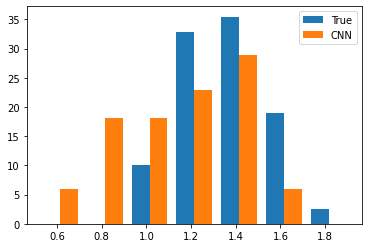

In [226]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [227]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3621288326512706 desvio= 0.20110347688312627 pontos= 79


In [228]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.1477862216028303 desvio= 0.27794086393294437 pontos= 83
